## Searching for Neutrinos in Antarctica using machine learning Code - Max Wieteska

The code below has been made to test the effectiveness of machine learning clustering techniques for use on Antarctic neutrino signal data.



In [1]:

import h5py
import numpy as np

import polartoolkit
import matplotlib.pyplot as plt
import cartopy

### Initialising the data
The first step is loading in the hdf5 data and storing it in a useful way, we load in the relevant runs then extract the signal and payload location data and store it in numpy arrays.

In [2]:


# Specify the range of run numbers you want to include
start_run = 62
end_run = 300

# List to store all opened HDF5 files
all_runs = []

# Loop through the range and open each HDF5 file
for run_number in range(start_run, end_run + 1):
    filename = f'miniSummaryRun{run_number}.hdf5'
    run = h5py.File(filename)
    all_runs.append(run)


In [3]:
all_runs[98]['longitude']

<HDF5 dataset "longitude": shape (232525,), type "<f4">

In [3]:
# Initialize an empty array to store combined data
combined_pLongitude = []
combined_pLatitude = []

# Loop through each opened HDF5 file and combine its data
for run in all_runs:
    # Assuming 'data' is the dataset you want to combine, replace it with your actual dataset name
    run_pLongitude = np.array(run['pLongitude'])
    combined_pLongitude.append(run_pLongitude)
    run_pLatitude = np.array(run['pLatitude'])
    combined_pLatitude.append(run_pLatitude)
    


In [4]:
print(len(combined_pLatitude[0]))

19099


In [4]:
# Initialize an empty array to store combined data
combined_Longitude = np.array([])
combined_Latitude = np.array([])

# Loop through each opened HDF5 file and combine its data
for run in all_runs:
    # Assuming 'data' is the dataset you want to combine, replace it with your actual dataset name
    run_Longitude = np.array(run['longitude'])
    combined_Longitude = np.concatenate((combined_Longitude,run_Longitude))
    run_Latitude = np.array(run['latitude'])
    combined_Latitude = np.concatenate((combined_Latitude,run_Latitude))

In [7]:
combined_Latitude[0]

-78.28868865966797

In [7]:
from numba import jit

In [5]:
# Initialize an empty array to store combined data
combined_pLongitude = np.empty((0,2,5))
combined_pLatitude = np.empty((0,2,5))

# Loop through each opened HDF5 file and combine its data

for run in all_runs:
    #print(run)
    # Assuming 'data' is the dataset you want to combine, replace it with your actual dataset name
    run_pLongitude = np.array(run['pLongitude'])
    combined_pLongitude = np.concatenate((combined_pLongitude,run_pLongitude),axis = 0)
    run_pLatitude = np.array(run['pLatitude'])
    combined_pLatitude = np.concatenate((combined_pLatitude,run_pLatitude),axis = 0)

### K-means clustering

Here we import the sklearn implementation of k-means clustering and apply it to the ANITA dataset. The K-means clustering was run on a smaller fraction of the data than the rest of this notebook as K-means was only a preliminary test whose suitability is easily identifyable from even a smaller fraction of data.

In [6]:
import numpy as np
from sklearn.cluster import KMeans


Below is an important step in the data reduction, we are getting rid of all the null signals and signals whose origin doesnt intersect the Antarctic continent.

In [7]:
pLong = combined_pLongitude[:,0][np.where((combined_pLongitude[:,0]>-9999)&(combined_pLongitude[:,0] !=0))]
pLat = combined_pLatitude[:,0][np.where((combined_pLatitude[:,0]>-9999)&(combined_pLatitude[:,0] !=0))]

In [8]:
indices = np.where((combined_pLatitude[:,0]>-9999)&(combined_pLatitude[:,0] !=0))

The below model would fail to give us a reasonable plot, so a coordinate transform was done.

In [ ]:
# Combine the arrays into a single 2D array
data = np.column_stack(( pLong, pLat))

# Specify the number of clusters (you can change this value)
num_clusters = 20

# Create a KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to the data
kmeans.fit_predict(data)

# Get the cluster assignments for each data point
labels = kmeans.labels_


In [ ]:

plt.figure()
plt.plot(pLong,pLat,c = labels)

In [ ]:
len(labels)

In [ ]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
scatter = ax.scatter(pLong+180, pLat+90,  c=labels, cmap='viridis')



Below is the function that transforms the longitude and latitude data to 'World Geodesic System 84' (WGS84), this allows for easier clustering in the long term.

In [8]:
from pyproj import Proj, transform

def convert_coordinates_to_antarctic_polar(lat, lon):
    # Define the projection for Antarctic Polar Stereographic (EPSG:3031)
    antarctic_polar_proj = Proj(proj="stere", ellps="WGS84", lat_0=-90, lon_0=0, k_0=1, x_0=0, y_0=0)

    # Convert latitude and longitude to Antarctic Polar Stereographic
    antarctic_polar_x, antarctic_polar_y = transform(Proj(proj="latlong", datum="WGS84"), antarctic_polar_proj, lon, lat)

    return antarctic_polar_x, antarctic_polar_y

# Example usage:
latitude = -90.0  # Replace with the actual latitude in the Antarctic
longitude = 0.0   # Replace with the actual longitude in the Antarctic

antarctic_polar_x, antarctic_polar_y = convert_coordinates_to_antarctic_polar(latitude, longitude)

print(f"Latitude: {latitude}, Longitude: {longitude}")
print(f"Antarctic Polar Stereographic X: {antarctic_polar_x}, Y: {antarctic_polar_y}")


Latitude: -90.0, Longitude: 0.0
Antarctic Polar Stereographic X: 0.0, Y: 0.0


C:\Users\max_w\AppData\Local\Temp\ipykernel_25936\1253522743.py:8: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  antarctic_polar_x, antarctic_polar_y = transform(Proj(proj="latlong", datum="WGS84"), antarctic_polar_proj, lon, lat)


In [9]:

import polartoolkit


In [10]:
p_x,p_y = convert_coordinates_to_antarctic_polar(pLat, pLong)
x,y = convert_coordinates_to_antarctic_polar(combined_Latitude, combined_Longitude)

C:\Users\max_w\AppData\Local\Temp\ipykernel_25936\1253522743.py:8: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  antarctic_polar_x, antarctic_polar_y = transform(Proj(proj="latlong", datum="WGS84"), antarctic_polar_proj, lon, lat)
C:\Users\max_w\AppData\Local\Temp\ipykernel_25936\1253522743.py:8: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  antarctic_polar_x, antarctic_polar_y = transform(Proj(proj="latlong", datum="WGS84"), antarctic_polar_proj, lon, lat)


Plotting to check if the transformed data looks as expected.

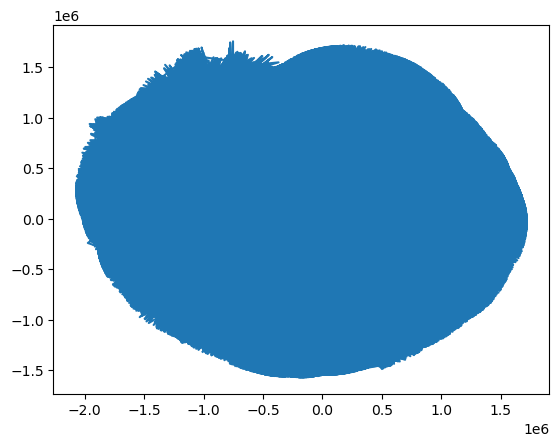

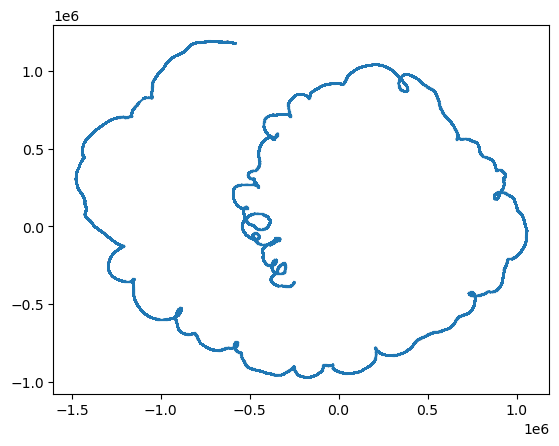

In [17]:
# Increase the path simplification threshold
plt.rcParams['path.simplify_threshold'] = 0.2  # You can adjust this value as needed

# Set the value of agg.path.chunksize to be greater than 100
plt.rcParams['agg.path.chunksize'] = 200  # You can adjust this value as needed
plt.figure()
plt.plot(p_x,p_y)
plt.figure()
plt.plot(x,y)

In [53]:
# Combine the arrays into a single 2D array
data = np.column_stack(( p_x, p_y))

# Specify the number of clusters 
num_clusters = 40

#  a KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to the data
kmeans.fit_predict(data)

# Get the cluster assignments for each data point
labels = kmeans.labels_


C:\Users\max_w\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


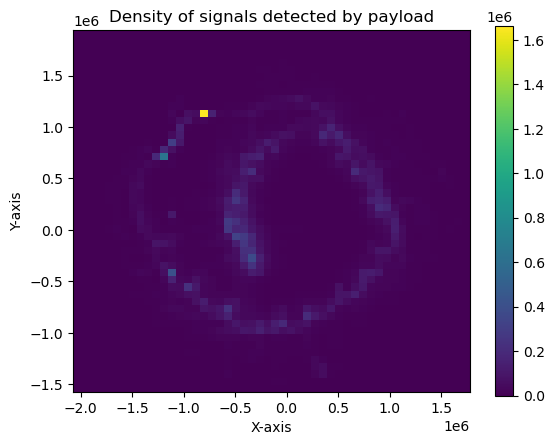

In [11]:

# Create a 2D histogram (density heatmap)
heatmap, xedges, yedges = np.histogram2d(p_x, p_y, bins=50)

# Plot the heatmap
plt.imshow(heatmap.T, extent=[xedges.min(), xedges.max(), yedges.min(), yedges.max()], origin='lower', cmap='viridis')

# Add a colorbar
plt.colorbar()

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Density of signals detected by payload')

# Show the plot
plt.show()

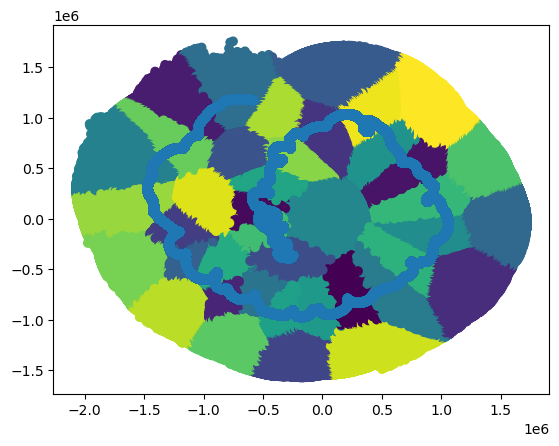

In [19]:
plt.figure()
plt.scatter(p_x,p_y,c = labels)
plt.scatter(x,y)

In [21]:
# Combine the arrays into a single 2D array
data = np.column_stack(( p_x, p_y))

# Specify the number of clusters (you can change this value)
num_clusters = 60

# Create a KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to the data
kmeans.fit_predict(data)

# Get the cluster assignments for each data point
labels = kmeans.labels_

C:\Users\max_w\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


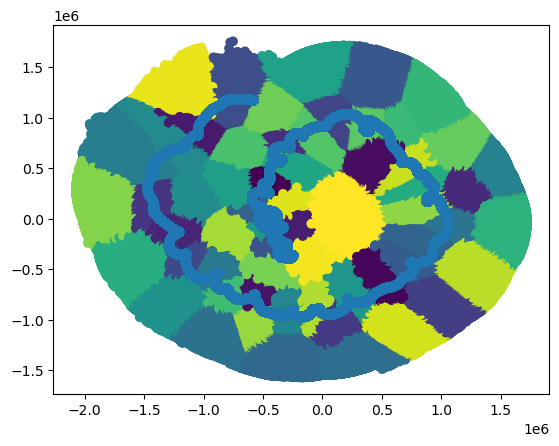

In [22]:
plt.figure()
plt.scatter(p_x,p_y,c = labels)
plt.scatter(x,y)

### Elbow method for k-means clustering

C:\Users\max_w\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\max_w\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\max_w\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\max_w\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

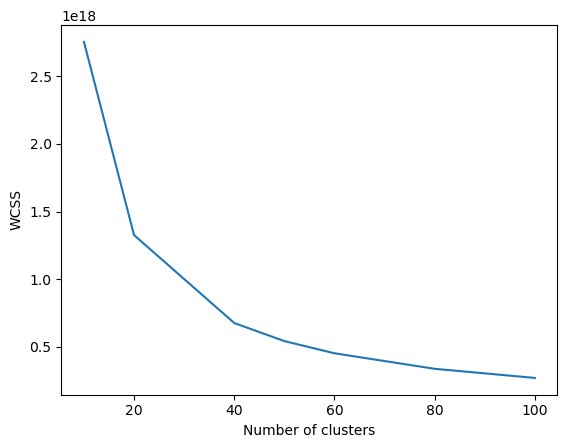

In [12]:

wcss = []
k = np.array((10,20,40,50,60,80,100))
data = np.column_stack(( p_x, p_y))
for i in k: 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data) 
    wcss.append(kmeans.inertia_)

plt.plot(k, wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

Below was some testing for higher dimensional k-means clustering using the trigger type for each data point in the run summary, however it was hard to notice any significant difference between this and normal k-means, so the result was omitted from the final report.

In [12]:
# Initialize an empty array to store combined data
combined_type = []


# Loop through each opened HDF5 file and combine its data
for run in all_runs:
    #print(run)
    # Assuming 'data' is the dataset you want to combine, replace it with your actual dataset name
    run_type = np.array(run['trigType'])
    combined_type = np.concatenate((combined_type,run_type),axis = 0)
    

In [ ]:
# Combine the arrays into a single 2D array
data = np.column_stack(( p_x, p_y,combined_type[]))

# Specify the number of clusters (you can change this value)
num_clusters = 50

# Create a KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to the data
kmeans.fit_predict(data)

# Get the cluster assignments for each data point
labels = kmeans.labels_


In [49]:
# Combine the arrays into a single 2D array
data = np.column_stack(( p_x, p_y,new_type))

# Specify the number of clusters (you can change this value)
num_clusters = 50

# Create a KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to the data
kmeans.fit_predict(data)

# Get the cluster assignments for each data point
labels = kmeans.labels_


C:\Users\max_w\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


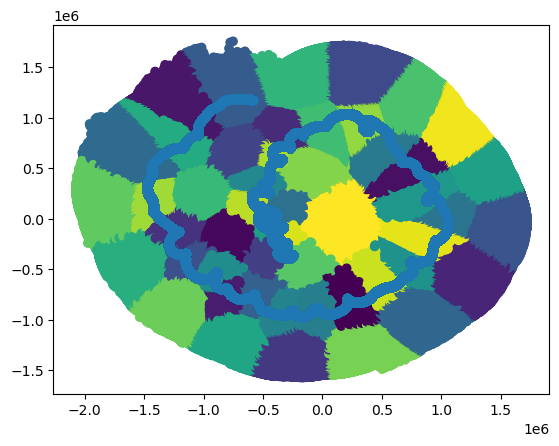

In [50]:
plt.figure()
plt.scatter(p_x,p_y,c = labels)
plt.scatter(x,y)

## OPTICS Clustering

In [11]:
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from sklearn.preprocessing import normalize, StandardScaler
import pandas as pd
from sklearn.cluster import DBSCAN

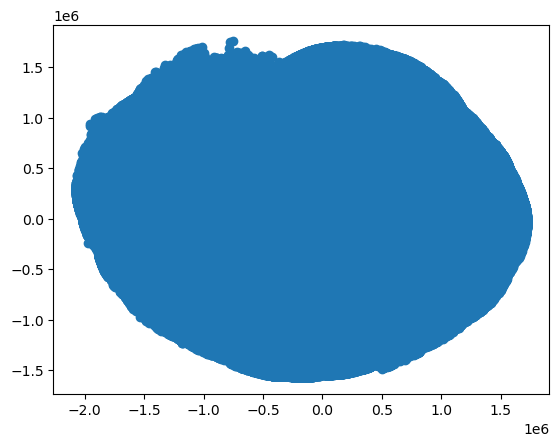

In [36]:
# Combine the arrays into a single 2D array
X= np.column_stack(( p_x, p_y))
X.shape




plt.figure()
plt.scatter(p_x,p_y)


In [12]:
X= np.column_stack(( p_x, p_y))

Below is the first completed OPTICS fit, you can see that only the first 1000000 data points are fit, this is because in my first attempt I tried to run OPTICS on the entire data set, but it took far too long to finish execution. So I only tried 1000000 points as a proof that OPTICS can work on this data.

In [14]:
# Create OPTICS model
optics_model = OPTICS(min_samples=5,  n_jobs = -1)

# Fit the model to the data
optics_model.fit(X[:1000000,:])

# Extract cluster labels
labels = optics_model.labels_



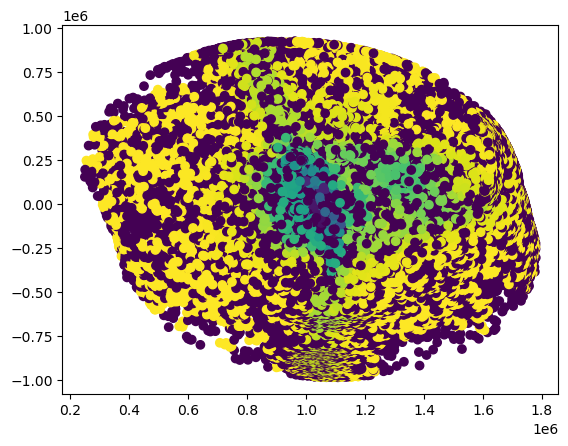

In [15]:
# Plotting the clusters
plt.figure()
plt.scatter(p_x[:1000000],p_y[:1000000],c=labels)

In [21]:
px_opt = p_x[:1000000]
py_opt = p_y[:1000000]

max(labels)

65211

In [16]:
reachability = optics_model.reachability_
core_distances = optics_model.core_distances_
max_reachability = 30
# Identify main clusters
main_clusters = [i for i, label in enumerate(labels) if reachability[i] < max_reachability and label != -1]

In [17]:
sorted_indices = np.argsort(reachability)

The below reachability plot was omitted from the final report as it resulted from the first 1000000 data points, and within the first 1000000 data points the overall structure of the data is not as clear as it would be from data sampled from the entire flight. OPTICS was later deemed to be less suitable regardless.

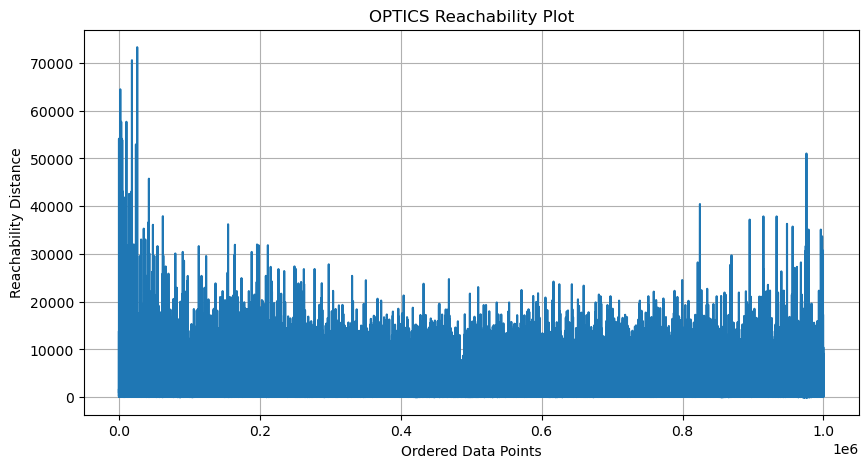

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(reachability)), reachability)
plt.title('OPTICS Reachability Plot')
plt.xlabel('Ordered Data Points')
plt.ylabel('Reachability Distance')
plt.grid(True)
plt.show()

In [19]:
threshold = 0.5  # Adjust threshold as needed
clusters = np.where(reachability <= threshold, 1, 0)

# Extract clusters directly from clustering labels
cluster_labels = optics_model.labels_
unique_clusters = np.unique(cluster_labels)
cluster_points = {cluster: np.column_stack((p_x[:1000000],p_y[:1000000]))[cluster_labels == cluster] for cluster in unique_clusters if cluster != -1}


KeyboardInterrupt



In [177]:
indices = np.where((labels==main_clusters))

C:\Users\max_w\AppData\Local\Temp\ipykernel_25164\1488684222.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  indices = np.where((labels==main_clusters))


In [1]:
#plt.figure()
#plt.scatter(px_opt[main_clusters],py_opt[main_clusters],c = 'black')
#plt.scatter(p_x[:100000],p_y[:100000],c = 'green')

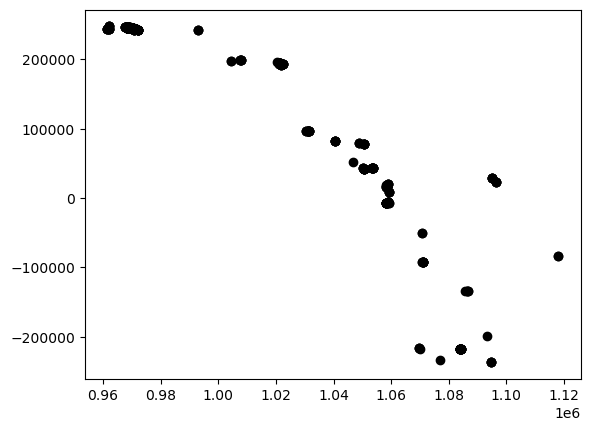

In [22]:
plt.figure()
plt.scatter(p_x[main_clusters],p_y[main_clusters],c = 'black')
#plt.scatter(p_x[:100000],p_y[:100000],c = 'green')

In [18]:
import geopandas as gpd


Below is importing a map of Antarctica to make plotting and comparing plots easier

In [19]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

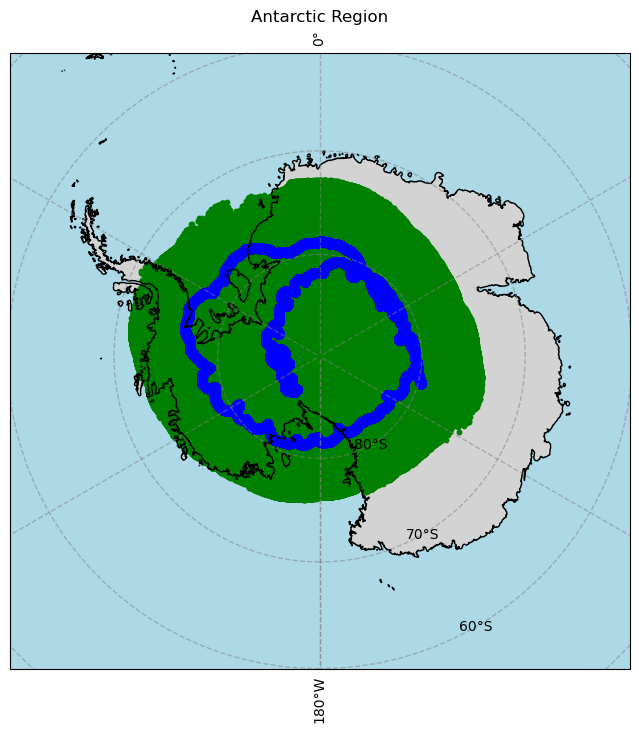

In [47]:


# Create a new figure with Cartopy projection
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())

# Plot the coastline
ax.coastlines(resolution='10m')

# Add features such as land, ocean, and lakes
ax.add_feature(cfeature.LAND, color='lightgray')
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.add_feature(cfeature.LAKES, color='lightblue')

# Set extent to the Antarctic region
ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())

# Plot your data here (replace with your own data plotting code)
plt.scatter(pLong, pLat, s=10, c='green', transform=ccrs.PlateCarree())
plt.scatter( combined_Longitude,combined_Latitude, c='blue',transform=ccrs.PlateCarree())

# Add gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}

plt.title('Antarctic Region')
plt.show()

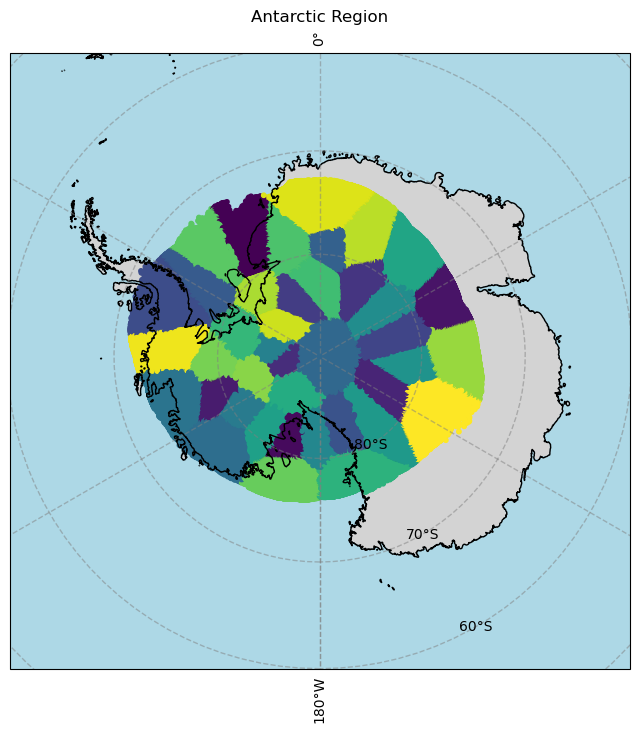

In [54]:
# Create a new figure with Cartopy projection
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())

# Plot the coastline
ax.coastlines(resolution='10m')

# Add features such as land, ocean, and lakes
ax.add_feature(cfeature.LAND, color='lightgray')
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.add_feature(cfeature.LAKES, color='lightblue')

# Set extent to the Antarctic region
ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())

# Plot your data here (replace with your own data plotting code)
plt.scatter(pLong, pLat, s=10, c=labels, transform=ccrs.PlateCarree())
#plt.scatter( combined_Longitude,combined_Latitude, c='blue',transform=ccrs.PlateCarree())

# Add gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}

plt.title('Antarctic Region')
plt.show()

In [50]:
len(pLong)

42441311

In [122]:
pLong_opt = pLong[:1000000]
pLat_opt = pLat[:1000000]


In [33]:
reachability = optics_model.reachability_
max_reachability = 800
min_cluster_size = 5
# Identify main clusters
main_clusters = [i for i, label in enumerate(labels) if reachability[i] < max_reachability and label != -1]
# Filter clusters based on minimum cluster size
main_clusters = [cluster for cluster in main_clusters if np.sum(labels == labels[cluster]) >= min_cluster_size]


Plotting a small chunk of the OPTICS fit onto Antarctica, a nearby station is also plotted to check for correlation.

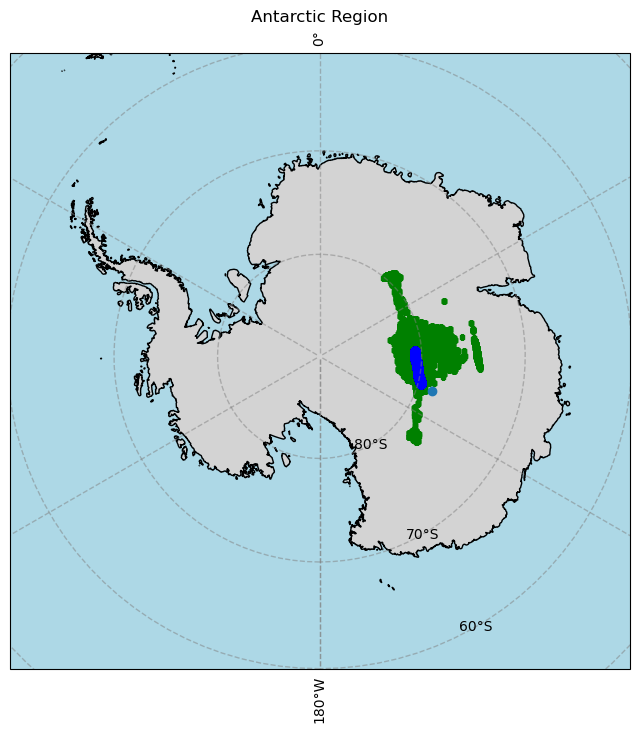

In [37]:
# Create a new figure with Cartopy projection
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())

# Plot the coastline
ax.coastlines(resolution='10m')

# Add features such as land, ocean, and lakes
ax.add_feature(cfeature.LAND, color='lightgray')
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.add_feature(cfeature.LAKES, color='lightblue')

# Set extent to the Antarctic region
ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())

# Plot your data here (replace with your own data plotting code)
#plt.scatter(pLong, pLat, s=10, c='blue', transform=ccrs.PlateCarree())
plt.scatter(pLong[main_clusters],pLat[main_clusters],s=10,c = 'green',marker = ',', transform=ccrs.PlateCarree())
plt.scatter((106.837328),(-78.464422), transform=ccrs.PlateCarree())
plt.scatter( combined_Longitude[:1000000][:1000000],combined_Latitude[:1000000], c='blue',transform=ccrs.PlateCarree())
# Add gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}

plt.title('Antarctic Region')
plt.show()

In [143]:
print(pLong[main_clusters])
print(pLat[main_clusters])

[104.60328363 102.27073187 106.79991666 ... 101.58777937 101.71765147
 101.78993913]
[-79.859395   -79.63885003 -79.70681739 ... -80.17662533 -79.87715665
 -79.86208304]


In [48]:
len(X[:-41441311,:])

1000000

In [4]:
# Create OPTICS model
#optics_model = OPTICS(min_samples=5,  n_jobs = -1)

# Fit the model to the data
#optics_model.fit(X[:-41441311,:])

# Extract cluster labels
#labels = optics_model.labels_


In [ ]:
pLong_opt = pLong[:-41441311]
pLat_opt = pLat[:-41441311]
reachability = optics_model.reachability_
max_reachability = 800
min_cluster_size = 5
# Identify main clusters
main_clusters = [i for i, label in enumerate(labels) if reachability[i] < max_reachability and label != -1]
# Filter clusters based on minimum cluster size
main_clusters = [cluster for cluster in main_clusters if np.sum(labels == labels[cluster]) >= min_cluster_size]

In [ ]:
# Create a new figure with Cartopy projection
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())

# Plot the coastline
ax.coastlines(resolution='10m')

# Add features such as land, ocean, and lakes
ax.add_feature(cfeature.LAND, color='lightgray')
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.add_feature(cfeature.LAKES, color='lightblue')

# Set extent to the Antarctic region
ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())

# Plot your data here (replace with your own data plotting code)
#plt.scatter(pLong, pLat, s=10, c='blue', transform=ccrs.PlateCarree())
plt.scatter(pLong[main_clusters],pLat[main_clusters],s=10,c = 'green',marker = ',', transform=ccrs.PlateCarree())
#plt.scatter((106.837328),(-78.464422), transform=ccrs.PlateCarree())
plt.scatter( combined_Longitude[:-41441311],combined_Latitude[:-41441311], c='blue',transform=ccrs.PlateCarree())
# Add gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}

plt.title('Antarctic Region')
plt.show()

## DBSCAN Clustering

Below is the first attempt at DBSCAN clustering applied on the last 10^6 data points.

In [41]:
# Create OPTICS model
dbscan_model = DBSCAN(eps = 1500,min_samples=2,  n_jobs = -1)

# Fit the model to the data
dbscan_model.fit(X[::10])

# Extract cluster labels
labels = dbscan_model.labels_

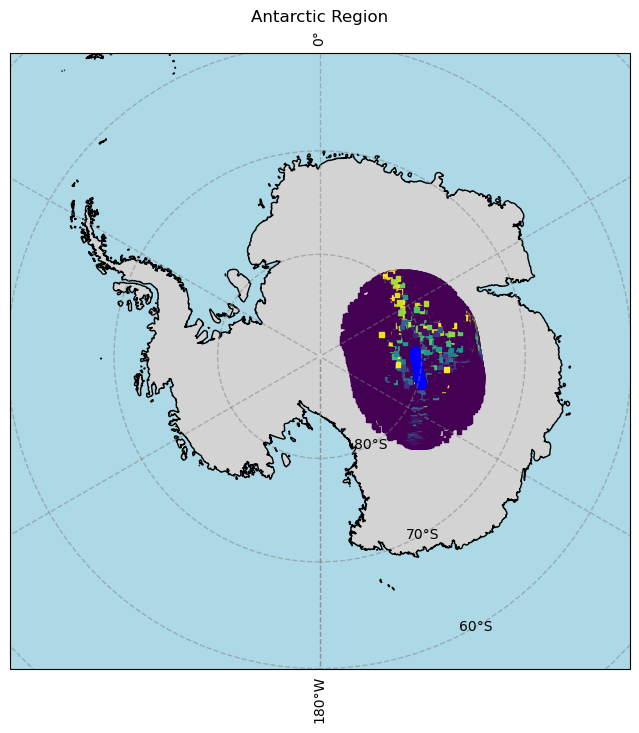

In [71]:
# Create a new figure with Cartopy projection
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())

# Plot the coastline
ax.coastlines(resolution='10m')

# Add features such as land, ocean, and lakes
ax.add_feature(cfeature.LAND, color='lightgray')
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.add_feature(cfeature.LAKES, color='lightblue')

# Set extent to the Antarctic region
ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())

# Plot your data here (replace with your own data plotting code)
#plt.scatter(pLong, pLat, s=10, c='blue', transform=ccrs.PlateCarree())
plt.scatter(pLong,pLat,s=10,c = labels,marker = ',', transform=ccrs.PlateCarree())
#plt.scatter((106.837328),(-78.464422), transform=ccrs.PlateCarree())
plt.scatter( combined_Longitude[:1000000],combined_Latitude[:1000000], c='blue',transform=ccrs.PlateCarree())
# Add gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}

plt.title('Antarctic Region')
plt.show()

In [66]:
len(X)
#len(labels)

42441311

I realised I could still test the suitability of clustering method by sampling the data at evenly spaced intervals, which allowed me to test over the whole duration of the flight to get the whole structure within the cluster.

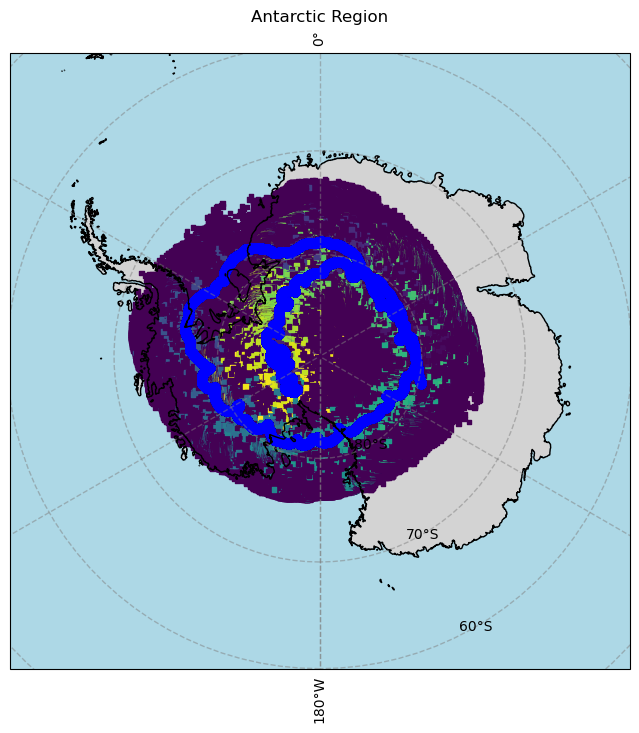

In [20]:
# Create a new figure with Cartopy projection
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())

# Plot the coastline
ax.coastlines(resolution='10m')

# Add features such as land, ocean, and lakes
ax.add_feature(cfeature.LAND, color='lightgray')
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.add_feature(cfeature.LAKES, color='lightblue')

# Set extent to the Antarctic region
ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())

# Plot your data here (replace with your own data plotting code)
#plt.scatter(pLong, pLat, s=10, c='blue', transform=ccrs.PlateCarree())
plt.scatter(pLong[::10],pLat[::10],s=10,c = labels,marker = ',', transform=ccrs.PlateCarree())
#plt.scatter((106.837328),(-78.464422), transform=ccrs.PlateCarree())
plt.scatter( combined_Longitude,combined_Latitude, c='blue',transform=ccrs.PlateCarree())
# Add gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}

plt.title('Antarctic Region')
plt.show()

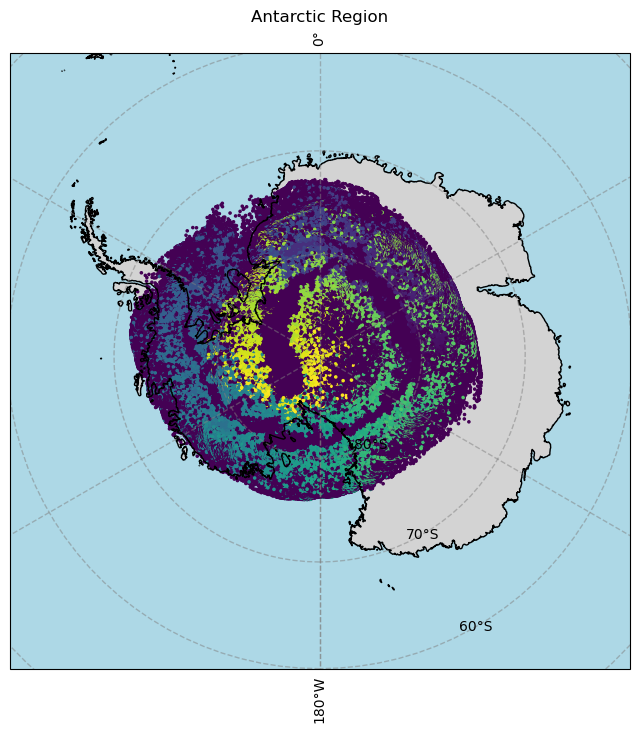

In [42]:
# Create a new figure with Cartopy projection
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())

# Plot the coastline
ax.coastlines(resolution='10m')

# Add features such as land, ocean, and lakes
ax.add_feature(cfeature.LAND, color='lightgray')
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.add_feature(cfeature.LAKES, color='lightblue')

# Set extent to the Antarctic region
ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())

# Plot your data here (replace with your own data plotting code)
#plt.scatter(pLong, pLat, s=10, c='blue', transform=ccrs.PlateCarree())
plt.scatter(pLong[::10],pLat[::10],s=10,c = labels,marker = '.', transform=ccrs.PlateCarree())
#plt.scatter((106.837328),(-78.464422), transform=ccrs.PlateCarree())
#plt.scatter( combined_Longitude,combined_Latitude, c='blue',transform=ccrs.PlateCarree())
# Add gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}

plt.title('Antarctic Region')
plt.show()

Here I am removing all data points that are assigned to a cluster. Although the resulting plot still looiks dense this is only because of the physical size of each point being many kilometers wide, in reality each point is separated by a distance of a few km.

In [43]:
iso_ind = np.where((labels ==-1))
lat_10 = pLat[::10]
long_10 = pLong[::10]
iso_lat = lat_10[iso_ind]
iso_long = long_10[iso_ind]
len(iso_ind[0])

270378

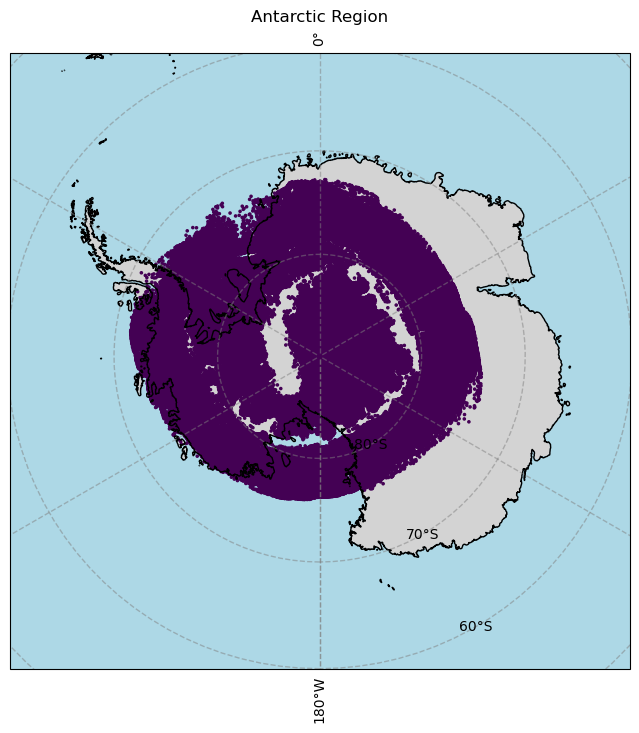

In [44]:
# Create a new figure with Cartopy projection
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())

# Plot the coastline
ax.coastlines(resolution='10m')

# Add features such as land, ocean, and lakes
ax.add_feature(cfeature.LAND, color='lightgray')
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.add_feature(cfeature.LAKES, color='lightblue')

# Set extent to the Antarctic region
ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())

# Plot your data here (replace with your own data plotting code)
#plt.scatter(pLong, pLat, s=10, c='blue', transform=ccrs.PlateCarree())
plt.scatter(iso_long,iso_lat,s=10,c = labels[iso_ind],marker = '.', transform=ccrs.PlateCarree())
#plt.scatter((106.837328),(-78.464422), transform=ccrs.PlateCarree())
#plt.scatter( combined_Longitude,combined_Latitude, c='blue',transform=ccrs.PlateCarree())
# Add gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}

plt.title('Antarctic Region')
plt.show()

Below is the OPTICS fit on every 40th point.

In [46]:
# Create OPTICS model
optics_model = OPTICS(min_samples=5,  n_jobs = -1)

# Fit the model to the data
optics_model.fit(X[::40])

# Extract cluster labels
labels_40 = optics_model.labels_

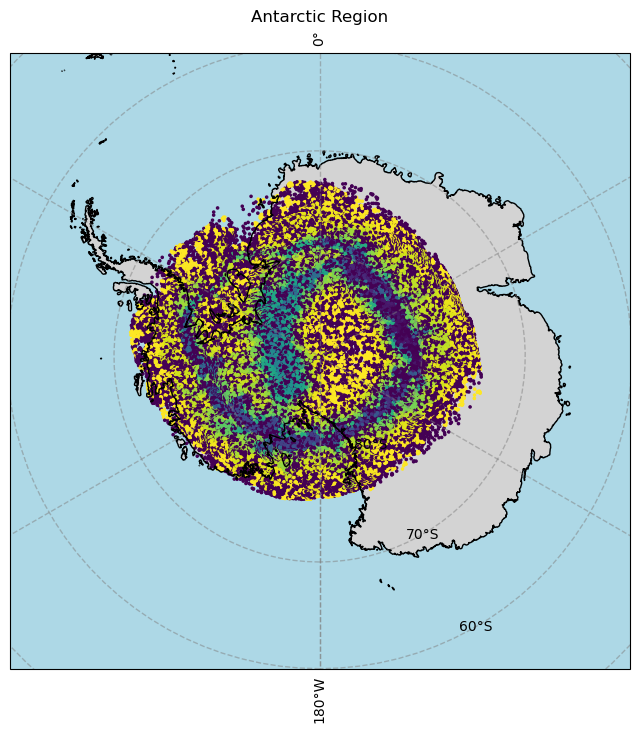

In [49]:
# Create a new figure with Cartopy projection
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())

# Plot the coastline
ax.coastlines(resolution='10m')

# Add features such as land, ocean, and lakes
ax.add_feature(cfeature.LAND, color='lightgray')
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.add_feature(cfeature.LAKES, color='lightblue')

# Set extent to the Antarctic region
ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())

# Plot your data here (replace with your own data plotting code)
#plt.scatter(pLong, pLat, s=10, c='blue', transform=ccrs.PlateCarree())
plt.scatter(pLong[::40],pLat[::40],s=10,c = labels_40,marker = '.', transform=ccrs.PlateCarree())
#plt.scatter((106.837328),(-78.464422), transform=ccrs.PlateCarree())
#plt.scatter( combined_Longitude[::40],combined_Latitude[::40], c='blue',transform=ccrs.PlateCarree())
# Add gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}

plt.title('Antarctic Region')
plt.show()

In [55]:
iso_ind = np.where((labels_40 ==-1))
lat_40 = pLat[::40]
long_40 = pLong[::40]
opt_iso_lat = lat_40[iso_ind]
opt_iso_long = long_40[iso_ind]
len(iso_ind[0])
len(labels_40)

1061033

Below we can see it is more difficult to do outlier detection.

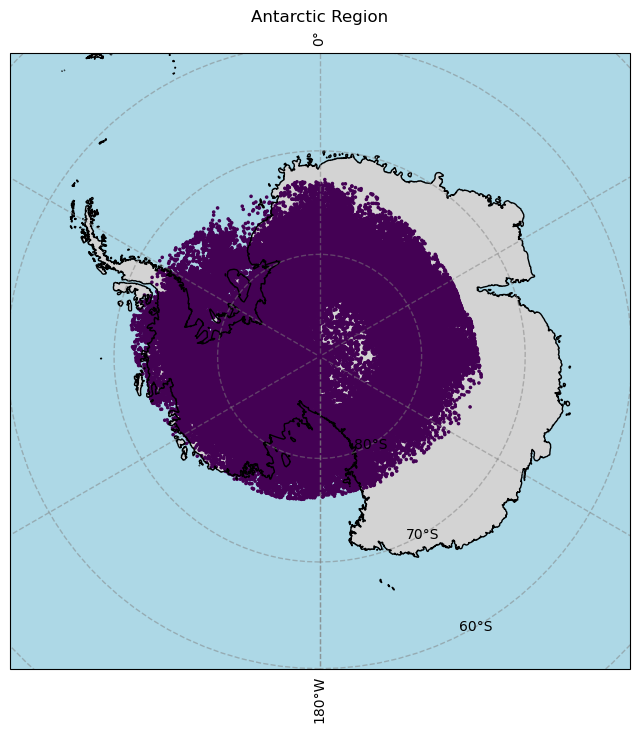

In [57]:
# Create a new figure with Cartopy projection
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())

# Plot the coastline
ax.coastlines(resolution='10m')

# Add features such as land, ocean, and lakes
ax.add_feature(cfeature.LAND, color='lightgray')
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.add_feature(cfeature.LAKES, color='lightblue')

# Set extent to the Antarctic region
ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())

# Plot your data here (replace with your own data plotting code)
#plt.scatter(pLong, pLat, s=10, c='blue', transform=ccrs.PlateCarree())
plt.scatter(opt_iso_long,opt_iso_lat,s=10,c = labels_40[iso_ind],marker = '.', transform=ccrs.PlateCarree())
#plt.scatter((106.837328),(-78.464422), transform=ccrs.PlateCarree())
#plt.scatter( combined_Longitude,combined_Latitude, c='blue',transform=ccrs.PlateCarree())
# Add gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}

plt.title('Antarctic Region')
plt.show()

In [58]:
# Create OPTICS model
optics_model_2 = OPTICS(min_samples=2, max_eps = 1500, n_jobs = -1)

# Fit the model to the data
optics_model_2.fit(X[::40])

# Extract cluster labels
labels_2_40 = optics_model_2.labels_

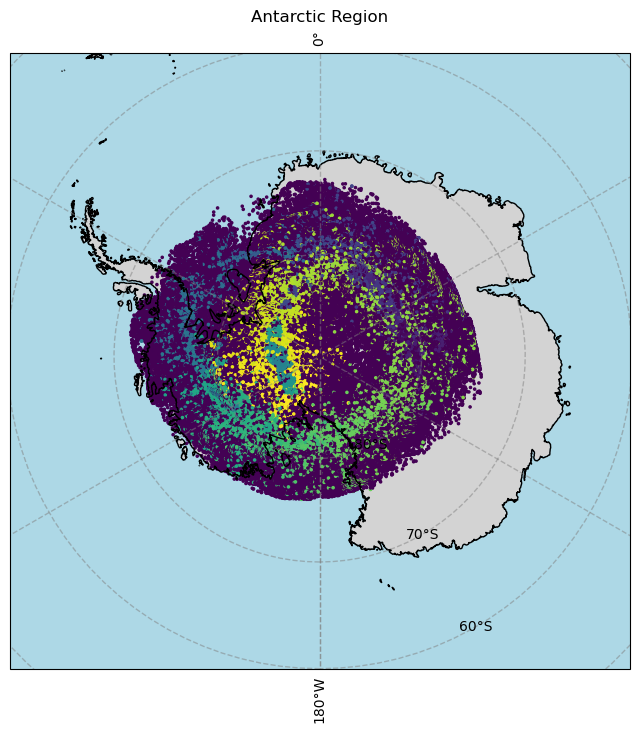

In [72]:
# Create a new figure with Cartopy projection
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())

# Plot the coastline
ax.coastlines(resolution='10m')

# Add features such as land, ocean, and lakes
ax.add_feature(cfeature.LAND, color='lightgray')
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.add_feature(cfeature.LAKES, color='lightblue')

# Set extent to the Antarctic region
ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())

# Plot your data here (replace with your own data plotting code)
#plt.scatter(pLong, pLat, s=10, c='blue', transform=ccrs.PlateCarree())
plt.scatter(pLong[::40],pLat[::40],s=10,c = labels_2_40,marker = '.', transform=ccrs.PlateCarree())
#plt.scatter((106.837328),(-78.464422), transform=ccrs.PlateCarree())
#plt.scatter( combined_Longitude[::40],combined_Latitude[::40], c='blue',transform=ccrs.PlateCarree())
# Add gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}

plt.title('Antarctic Region')
plt.show()

In [68]:
iso_2_ind = np.where((labels_2_40 !=-1))
lat_2_40 = pLat[::40]
long_2_40 = pLong[::40]
opt_2_iso_lat = lat_2_40[iso_2_ind]
opt_2_iso_long = long_2_40[iso_2_ind]
len(iso_ind[0])
len(labels_40)
print(iso_2_ind[0])
len(np.unique(labels_2_40))

[      0       2       3 ... 1061025 1061027 1061031]


269689

Below is all points that are clustered using OPTICS.

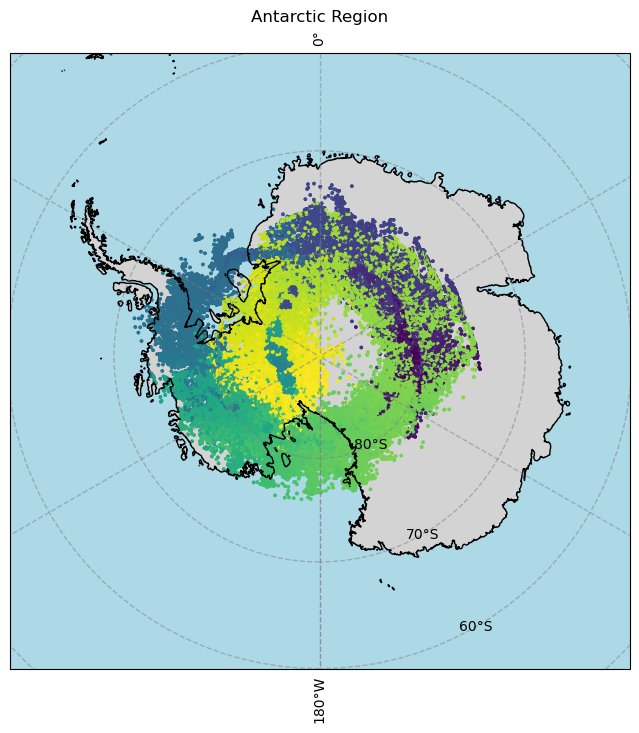

In [63]:
# Create a new figure with Cartopy projection
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())

# Plot the coastline
ax.coastlines(resolution='10m')

# Add features such as land, ocean, and lakes
ax.add_feature(cfeature.LAND, color='lightgray')
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.add_feature(cfeature.LAKES, color='lightblue')

# Set extent to the Antarctic region
ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())

# Plot your data here (replace with your own data plotting code)
#plt.scatter(pLong, pLat, s=10, c='blue', transform=ccrs.PlateCarree())
plt.scatter(opt_2_iso_long,opt_2_iso_lat,s=10,c = labels_2_40[iso_2_ind],marker = '.', transform=ccrs.PlateCarree())
#plt.scatter((106.837328),(-78.464422), transform=ccrs.PlateCarree())
#plt.scatter( combined_Longitude,combined_Latitude, c='blue',transform=ccrs.PlateCarree())
# Add gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}

plt.title('Antarctic Region')
plt.show()

In [ ]:
reachability = optics_model_2.reachability_
ordering  =optics_model_2.ordering_

plt.figure()
plt.plot()

In [70]:
optics_model_3 = OPTICS(min_samples=2, max_eps = 40, n_jobs = -1)

# Fit the model to the data
optics_model_3.fit(X[::35])

# Extract cluster labels
labels_3_35 = optics_model_3.labels_

Below is a failed optics fit, not sure what occured here.

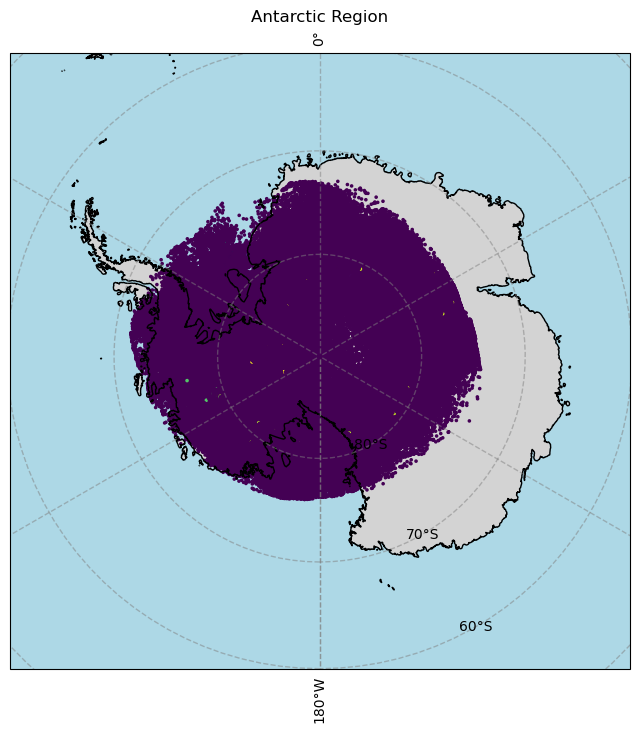

In [71]:
# Create a new figure with Cartopy projection
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())

# Plot the coastline
ax.coastlines(resolution='10m')

# Add features such as land, ocean, and lakes
ax.add_feature(cfeature.LAND, color='lightgray')
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.add_feature(cfeature.LAKES, color='lightblue')

# Set extent to the Antarctic region
ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())

# Plot your data here (replace with your own data plotting code)
#plt.scatter(pLong, pLat, s=10, c='blue', transform=ccrs.PlateCarree())
plt.scatter(pLong[::35],pLat[::35],s=10,c = labels_3_35,marker = '.', transform=ccrs.PlateCarree())
#plt.scatter((106.837328),(-78.464422), transform=ccrs.PlateCarree())
#plt.scatter( combined_Longitude[::40],combined_Latitude[::40], c='blue',transform=ccrs.PlateCarree())
# Add gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}

plt.title('Antarctic Region')
plt.show()

Trying to optimise the parameters.

In [19]:
eps_values = np.array((100,250,500,1000,1500,2000,2250,2500,3000))
num_isolated = []
num_clusters = []

for i in eps_values:
    # Create OPTICS model
    dbscan_model = DBSCAN(eps = i,min_samples=2,  n_jobs = -1)

    # Fit the model to the data
    dbscan_model.fit(X[::10])

    # Extract cluster labels
    labels = dbscan_model.labels_
    
    num_isolated.append(len(labels[np.where((labels==-1))]))
    num_clusters.append(len(np.unique(labels)))

Text(0.5, 0, 'ε')

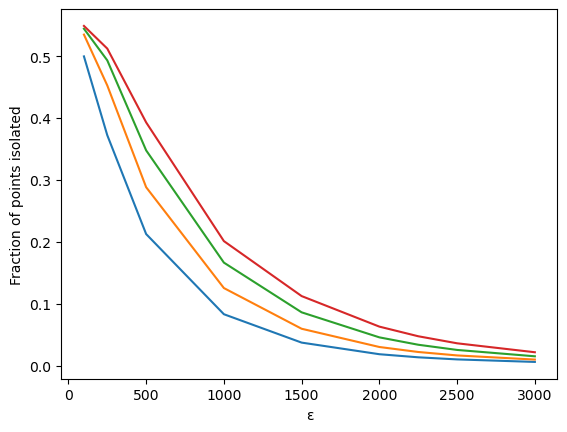

In [60]:
len(x[::10])
plt.figure()
plt.plot(eps_values,np.array(num_isolated)/7292765)
plt.ylabel('Fraction of points isolated')
plt.xlabel('ε')

In [21]:
print(np.array(num_isolated)[-1]/7292765)
print(num_clusters[-1])

0.00585690064056637
35283


Text(0.5, 0, 'ε')

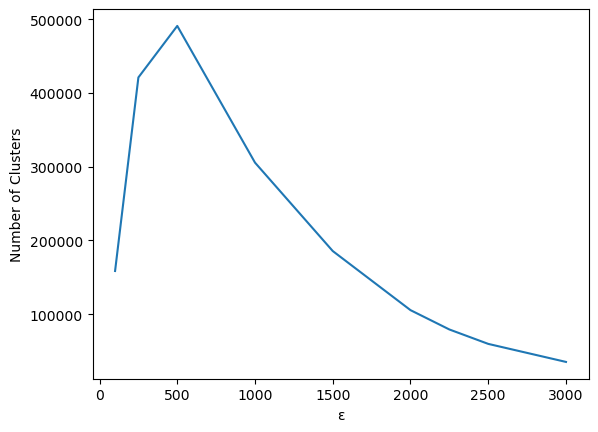

In [22]:
plt.figure()
plt.plot(eps_values,num_clusters)
plt.ylabel('Number of Clusters')
plt.xlabel('ε')

Testing through varying epsilon and min_samples.


In [16]:
eps_values = np.array((100,250,500,1000,1500,2000,2250,2500,3000))
min_values = np.array((2,3,4,5))
num_isolated = []
num_clusters = []

for i in eps_values:
    for j in min_values:
        # Create OPTICS model
        dbscan_model = DBSCAN(eps = i,min_samples=j,  n_jobs = -1)

        # Fit the model to the data
        dbscan_model.fit(X[::10])

        # Extract cluster labels
        labels = dbscan_model.labels_
    
        num_isolated.append(len(labels[np.where((labels==-1))]))
        num_clusters.append(len(np.unique(labels)))

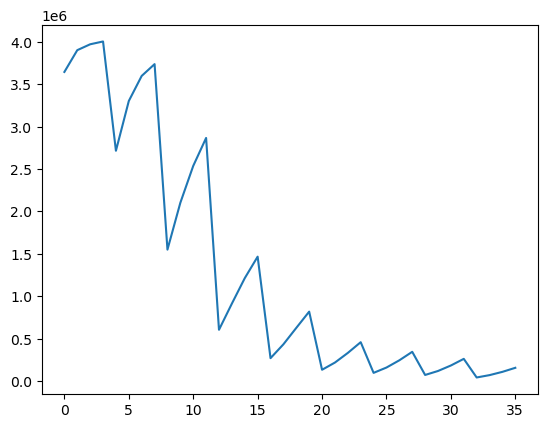

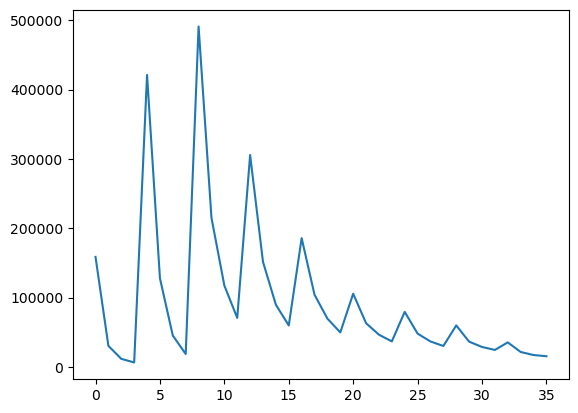

In [18]:
plt.figure()
plt.plot(num_isolated)
plt.figure()
plt.plot(num_clusters)

Text(0, 0.5, 'Number of clusters')

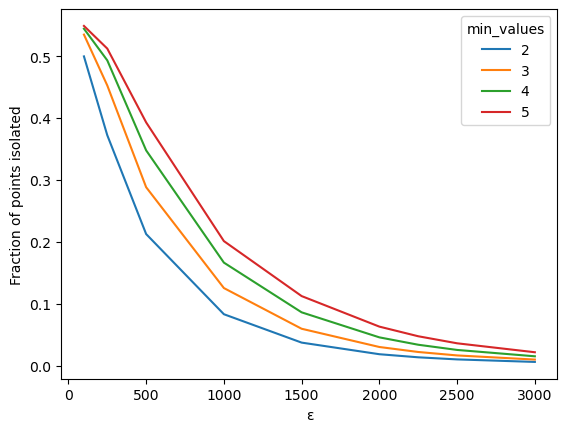

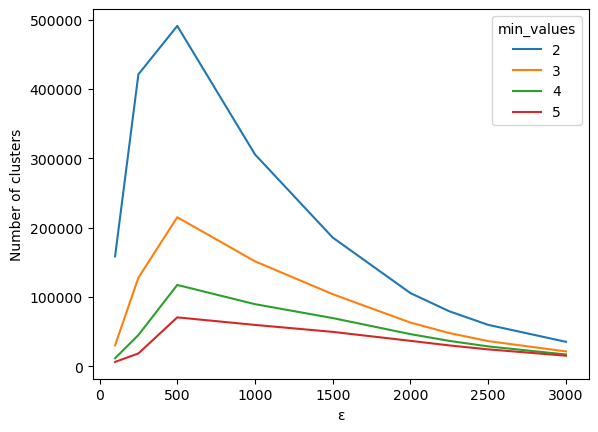

In [48]:
num_isolated = np.reshape(num_isolated,(9,4))
num_clusters = np.reshape(num_clusters,(9,4))
plt.figure()
plt.plot(eps_values,num_isolated/7292765,label = min_values)
plt.legend(title = 'min_values')
plt.xlabel('ε')
plt.ylabel('Fraction of points isolated')
plt.figure()
plt.plot(eps_values,num_clusters, label = min_values)
plt.legend(title = 'min_values')
plt.xlabel('ε')
plt.ylabel('Number of clusters')

In [55]:
print(num_isolated[8,1]/7292765)
print(num_clusters[8,1])

0.009660396296877797
21414


In [24]:
from mpl_toolkits import mplot3d


In [42]:
eps_values_2 = np.array((100,250,500,750,1000))
num_isolated_2 = []
num_clusters_2 = []

for i in eps_values_2:
    # Create OPTICS model
    dbscan_model = DBSCAN(eps = i,min_samples=2,  n_jobs = -1)

    # Fit the model to the data
    dbscan_model.fit(X[::10])

    # Extract cluster labels
    labels = dbscan_model.labels_
    
    num_isolated_2.append(len(labels[np.where((labels==-1))]))
    num_clusters_2.append(len(np.unique(labels)))

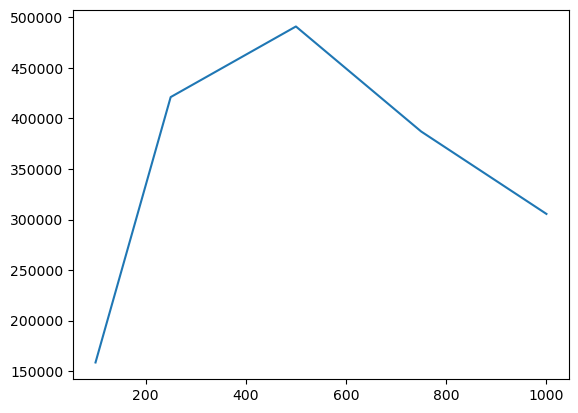

In [43]:
plt.figure()
plt.plot(eps_values_2,num_clusters_2)

In [23]:
import time
N = np.array([50,100,150,200,250,400,800,1000,2000,5000,10000])
optic_times  = []
dbscan_times = []

time_optics_model = OPTICS(min_samples=2,max_eps = 1000,  n_jobs = -1)
time_dbscan_model = DBSCAN(eps = 1000,min_samples = 2,n_jobs = -1)
for i in N:
    
    ot1 = time.time()
    time_optics_model.fit(X[:i,:])
    ot2 = time.time()
    
    optic_times.append(ot2-ot1)
    
    dt1 = time.time()
    time_dbscan_model.fit(X[:i,:])
    dt2 = time.time()
    
    dbscan_times.append(dt2-dt1)
    
    



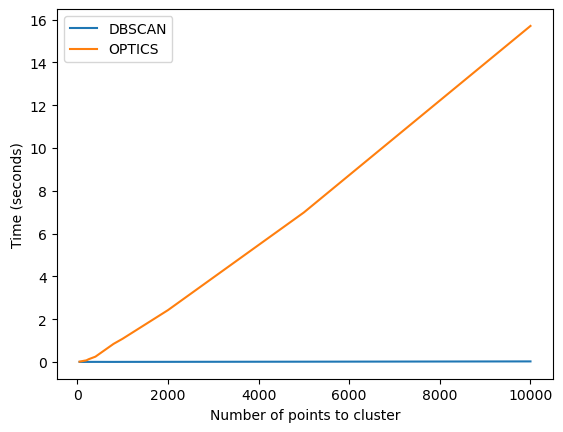

In [27]:
plt.figure()
plt.plot(N,dbscan_times,label = 'DBSCAN')
plt.plot(N,optic_times,label = 'OPTICS')
plt.ylabel('Time (seconds)')
plt.xlabel('Number of points to cluster')
plt.legend()

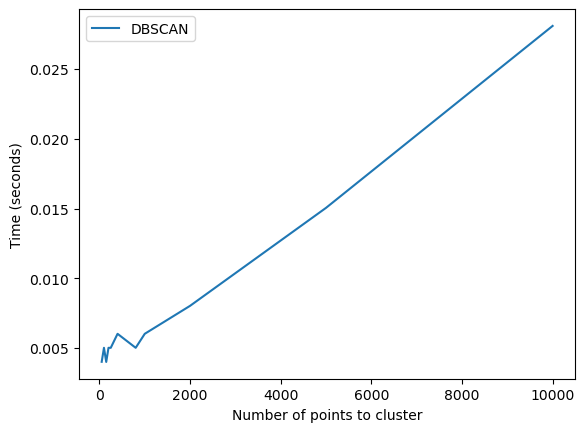

In [30]:
plt.figure()
plt.plot(N,dbscan_times,label = 'DBSCAN')
plt.xlabel('Number of points to cluster')
plt.ylabel('Time (seconds)')
plt.legend()

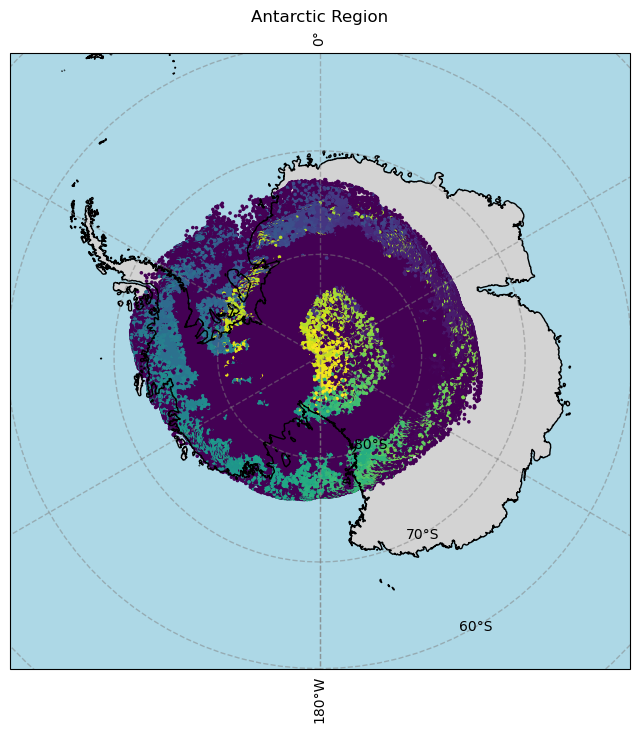

In [23]:
# Create a new figure with Cartopy projection
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())

# Plot the coastline
ax.coastlines(resolution='10m')

# Add features such as land, ocean, and lakes
ax.add_feature(cfeature.LAND, color='lightgray')
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.add_feature(cfeature.LAKES, color='lightblue')

# Set extent to the Antarctic region
ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())

# Plot your data here (replace with your own data plotting code)
#plt.scatter(pLong, pLat, s=10, c='blue', transform=ccrs.PlateCarree())
plt.scatter(pLong[::10],pLat[::10],s=10,c = labels,marker = '.', transform=ccrs.PlateCarree())
#plt.scatter((106.837328),(-78.464422), transform=ccrs.PlateCarree())
#plt.scatter( combined_Longitude[::40],combined_Latitude[::40], c='blue',transform=ccrs.PlateCarree())
# Add gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}

plt.title('Antarctic Region')
plt.show()

In [25]:
iso_ind = np.where((labels ==-1))
lat_10 = pLat[::10]
long_10 = pLong[::10]
iso_lat = lat_10[iso_ind]
iso_long = long_10[iso_ind]
len(iso_ind[0])

42713

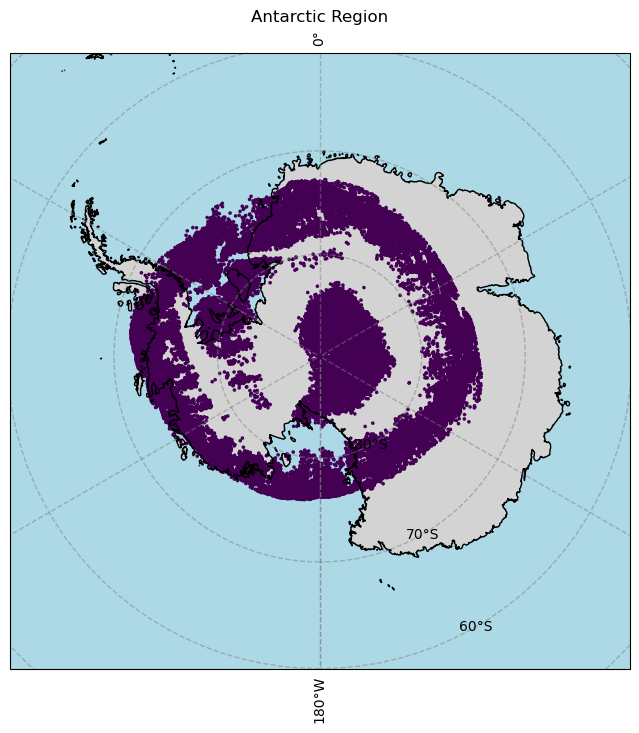

In [26]:
# Create a new figure with Cartopy projection
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())

# Plot the coastline
ax.coastlines(resolution='10m')

# Add features such as land, ocean, and lakes
ax.add_feature(cfeature.LAND, color='lightgray')
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.add_feature(cfeature.LAKES, color='lightblue')

# Set extent to the Antarctic region
ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())

# Plot your data here (replace with your own data plotting code)
#plt.scatter(pLong, pLat, s=10, c='blue', transform=ccrs.PlateCarree())
plt.scatter(iso_long,iso_lat,s=10,c = labels[iso_ind],marker = '.', transform=ccrs.PlateCarree())
#plt.scatter((106.837328),(-78.464422), transform=ccrs.PlateCarree())
#plt.scatter( combined_Longitude,combined_Latitude, c='blue',transform=ccrs.PlateCarree())
# Add gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}

plt.title('Antarctic Region')
plt.show()

Below I wanted to have a closer look at the resulting fit to see how sparse the resulting data actually is, also to try and find any interesting features.

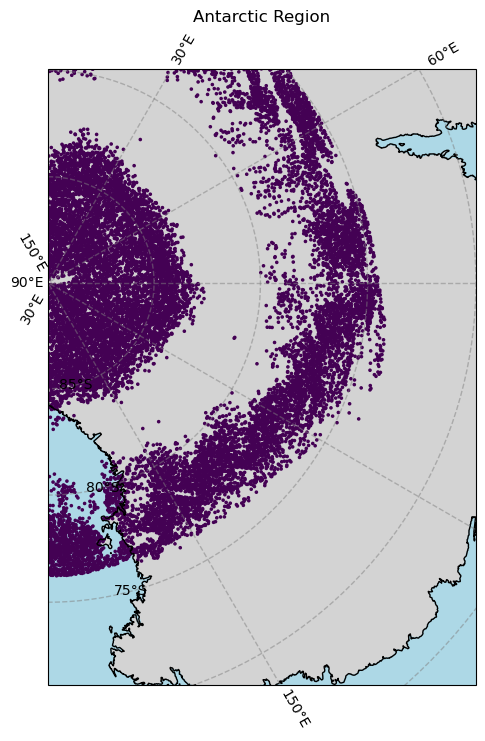

In [27]:
# Create a new figure with Cartopy projection
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())

# Plot the coastline
ax.coastlines(resolution='10m')

# Add features such as land, ocean, and lakes
ax.add_feature(cfeature.LAND, color='lightgray')
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.add_feature(cfeature.LAKES, color='lightblue')

# Set extent to the Antarctic region
ax.set_extent([60, 160, -90, -70], crs=ccrs.PlateCarree())

# Plot your data here (replace with your own data plotting code)
#plt.scatter(pLong, pLat, s=10, c='blue', transform=ccrs.PlateCarree())
plt.scatter(iso_long,iso_lat,s=10,c = labels[iso_ind],marker = '.', transform=ccrs.PlateCarree())
#plt.scatter((106.837328),(-78.464422), transform=ccrs.PlateCarree())
#plt.scatter( combined_Longitude,combined_Latitude, c='blue',transform=ccrs.PlateCarree())
# Add gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}

plt.title('Antarctic Region')
plt.show()

In [13]:
dbscan_model_fin = DBSCAN(eps = 3000,min_samples=3,  n_jobs = -1)

# Fit the model to the data
dbscan_model_fin.fit(X[::10])



DBSCAN(eps=3000, min_samples=3, n_jobs=-1)

In [14]:
    # Extract cluster labels
labels_fin = dbscan_model_fin.labels_
len(labels_fin)

4244132

In [16]:
iso_ind = np.where((labels_fin ==-1))
lat_10 = pLat[::10]
long_10 = pLong[::10]
iso_lat = lat_10[iso_ind]
iso_long = long_10[iso_ind]
print(len(iso_ind[0]))

70451


Below is the final fit used in the report.

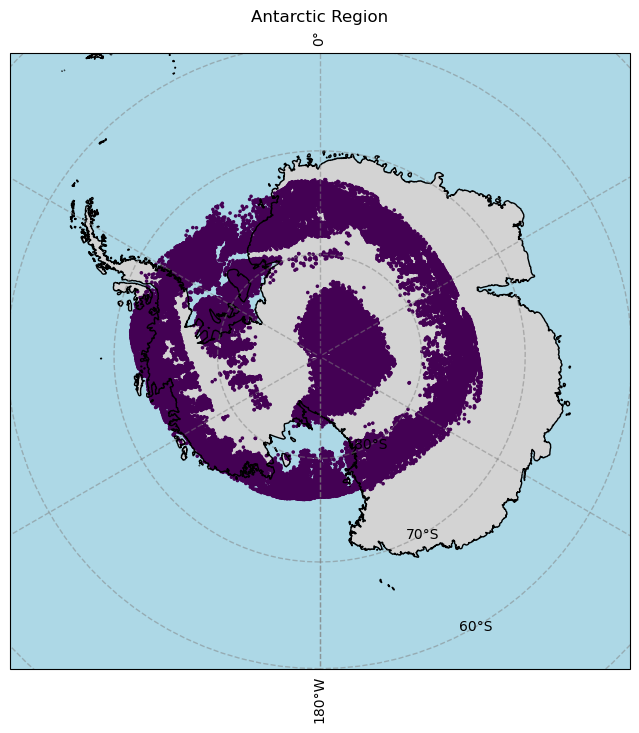

In [20]:
# Create a new figure with Cartopy projection
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())

# Plot the coastline
ax.coastlines(resolution='10m')

# Add features such as land, ocean, and lakes
ax.add_feature(cfeature.LAND, color='lightgray')
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.add_feature(cfeature.LAKES, color='lightblue')

# Set extent to the Antarctic region
ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())

# Plot your data here (replace with your own data plotting code)
#plt.scatter(pLong, pLat, s=10, c='blue', transform=ccrs.PlateCarree())
plt.scatter(iso_long,iso_lat,s=10,c = labels_fin[iso_ind],marker = '.', transform=ccrs.PlateCarree())
#plt.scatter((106.837328),(-78.464422), transform=ccrs.PlateCarree())
#plt.scatter( combined_Longitude,combined_Latitude, c='blue',transform=ccrs.PlateCarree())
# Add gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}

plt.title('Antarctic Region')
plt.show()

Here I wanted to check if there were some metrics to explicitly rank the dbscan fits, but they took too long to execute so were not included in the report.

In [23]:
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.metrics import silhouette_score

In [3]:
#silhouette_avg = silhouette_score(X[::10], labels_fin)

#print("The average silhouette score is:", silhouette_avg)

Here I was looking at the biggest clusters by population from the final fit and looking for any features that were harder to spot from just looking at the overall fit. The below code returns an incredibly long list of clusters so it is hashed out to save space when viewing the notebook on github.

In [47]:
# Get the unique values and their counts
#unique_values, counts = np.unique(labels, return_counts=True)

# Print the results
#for value, count in zip(unique_values, counts):
    #print(f"{value} occurs {count} times")

-1 occurs 72369 times
0 occurs 3705311 times
1 occurs 2 times
2 occurs 7 times
3 occurs 2 times
4 occurs 1799 times
5 occurs 5 times
6 occurs 203 times
7 occurs 8865 times
8 occurs 73 times
9 occurs 19 times
10 occurs 2 times
11 occurs 2 times
12 occurs 5 times
13 occurs 30 times
14 occurs 3 times
15 occurs 2 times
16 occurs 9 times
17 occurs 7 times
18 occurs 8 times
19 occurs 24 times
20 occurs 5 times
21 occurs 6 times
22 occurs 2 times
23 occurs 2 times
24 occurs 2 times
25 occurs 3 times
26 occurs 2 times
27 occurs 29 times
28 occurs 159 times
29 occurs 2 times
30 occurs 2 times
31 occurs 86 times
32 occurs 31 times
33 occurs 3 times
34 occurs 2 times
35 occurs 2 times
36 occurs 2 times
37 occurs 2 times
38 occurs 2 times
39 occurs 2 times
40 occurs 2 times
41 occurs 2 times
42 occurs 16 times
43 occurs 78 times
44 occurs 4 times
45 occurs 18 times
46 occurs 2 times
47 occurs 13 times
48 occurs 6 times
49 occurs 2 times
50 occurs 16 times
51 occurs 43 times
52 occurs 3 times
53 oc

In [68]:
print(np.where((counts < 200)))

(array([    2,     3,     4, ..., 59735, 59736, 59737], dtype=int64),)


In [60]:
main_cluster = np.where((labels==0))
secondary_cluster = np.where((labels==7))
third_cluster = np.where((labels==4))

In [54]:


main_lat = lat_10[main_cluster]
main_long = long_10[main_cluster]


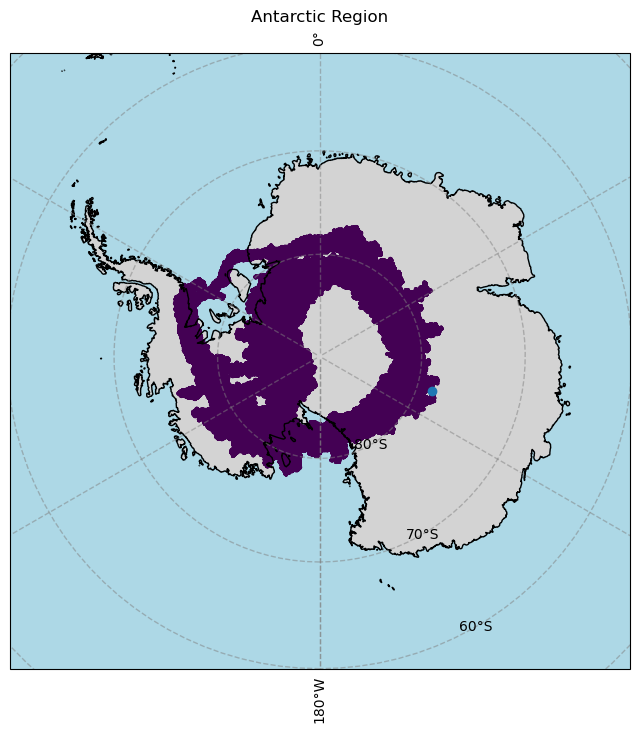

In [83]:
# Create a new figure with Cartopy projection
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())

# Plot the coastline
ax.coastlines(resolution='10m')

# Add features such as land, ocean, and lakes
ax.add_feature(cfeature.LAND, color='lightgray')
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.add_feature(cfeature.LAKES, color='lightblue')

# Set extent to the Antarctic region
ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())

# Plot your data here (replace with your own data plotting code)
#plt.scatter(pLong, pLat, s=10, c='blue', transform=ccrs.PlateCarree())
plt.scatter(main_long,main_lat,s=10,c = labels[main_cluster],marker = '.', transform=ccrs.PlateCarree())
plt.scatter((106.837328),(-78.464422), transform=ccrs.PlateCarree())
#plt.scatter( combined_Longitude,combined_Latitude, c='blue',transform=ccrs.PlateCarree())
# Add gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}

plt.title('Antarctic Region')
plt.show()

In [58]:
secondary_lat = lat_10[secondary_cluster]
secondary_long = long_10[secondary_cluster]

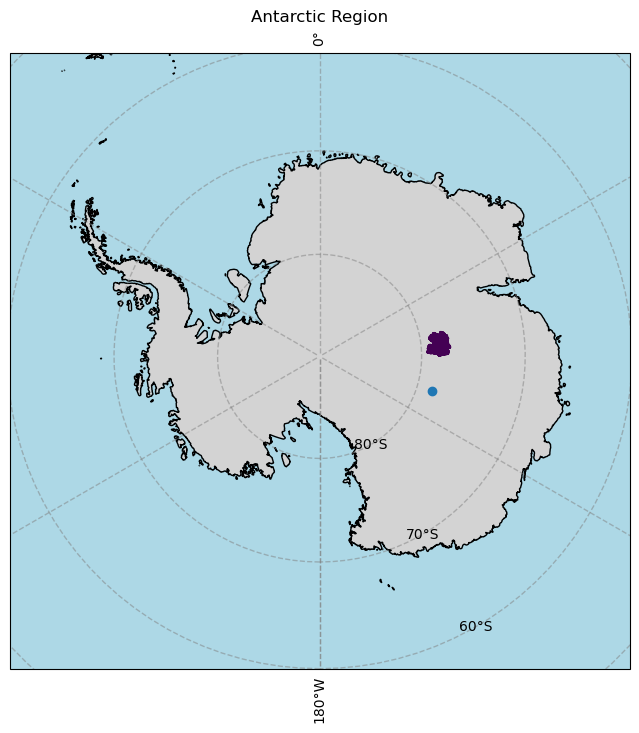

In [66]:
# Create a new figure with Cartopy projection
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())

# Plot the coastline
ax.coastlines(resolution='10m')

# Add features such as land, ocean, and lakes
ax.add_feature(cfeature.LAND, color='lightgray')
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.add_feature(cfeature.LAKES, color='lightblue')

# Set extent to the Antarctic region
ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())

# Plot your data here (replace with your own data plotting code)
#plt.scatter(pLong, pLat, s=10, c='blue', transform=ccrs.PlateCarree())
plt.scatter(secondary_long,secondary_lat,s=10,c = labels[secondary_cluster],marker = '.', transform=ccrs.PlateCarree())
plt.scatter((106.837328),(-78.464422), transform=ccrs.PlateCarree())
#plt.scatter( combined_Longitude,combined_Latitude, c='blue',transform=ccrs.PlateCarree())
# Add gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}

plt.title('Antarctic Region')
plt.show()

In [61]:
third_lat = lat_10[third_cluster]
third_long = long_10[third_cluster]

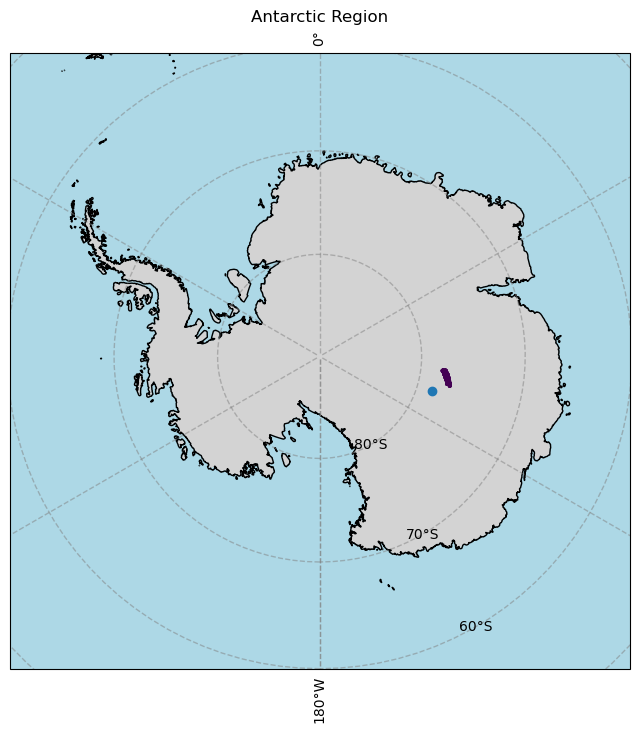

In [65]:
# Create a new figure with Cartopy projection
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())

# Plot the coastline
ax.coastlines(resolution='10m')

# Add features such as land, ocean, and lakes
ax.add_feature(cfeature.LAND, color='lightgray')
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.add_feature(cfeature.LAKES, color='lightblue')

# Set extent to the Antarctic region
ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())

# Plot your data here (replace with your own data plotting code)
#plt.scatter(pLong, pLat, s=10, c='blue', transform=ccrs.PlateCarree())
plt.scatter(third_long,third_lat,s=10,c = labels[third_cluster],marker = '.', transform=ccrs.PlateCarree())
plt.scatter((106.837328),(-78.464422), transform=ccrs.PlateCarree())
#plt.scatter( combined_Longitude,combined_Latitude, c='blue',transform=ccrs.PlateCarree())
# Add gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}

plt.title('Antarctic Region')
plt.show()

In [64]:
print(secondary_lat)
print(secondary_long)

[-78.21625315 -78.4851319  -78.91295226 ... -78.60018701 -78.67184714
 -78.71749585]
[82.07696048 80.27204424 86.55436304 ... 79.7734272  80.01871158
 79.92019895]


In [81]:
# Filter values where counts are greater than 200
selected_labels = [value for value, count in zip(unique_values, counts) if count > 200]
print(selected_labels)

[-1, 0, 4, 6, 7, 67, 99, 237, 679, 1232, 1275, 1971, 2279, 2687, 2802, 3141, 3225, 3488, 3520, 3684, 3822, 3923, 4199, 4741, 5182, 5258, 7163, 9058, 9907, 10075, 11589, 13702, 15443, 16369, 16635, 16947, 17314, 18450, 18582, 19357, 19637, 19688, 20065, 21406, 21749, 21966, 22831, 23945, 24336, 25732, 25750, 26065, 26174, 26273, 28233, 29093, 29450, 29669, 29912, 30848, 31322, 32794, 33316, 33346, 33527, 35035, 35408, 35632, 35662, 37111, 39512, 39552, 39921, 54541]


In [82]:

select = np.where((labels==selected_labels)&(labels!=-1))
select_lat = lat_10[select]
select_long = long_10[select]
print(select)

(array([], dtype=int64),)


C:\Users\max_w\AppData\Local\Temp\ipykernel_5168\3324034888.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  select = np.where((labels==selected_labels)&(labels!=-1))


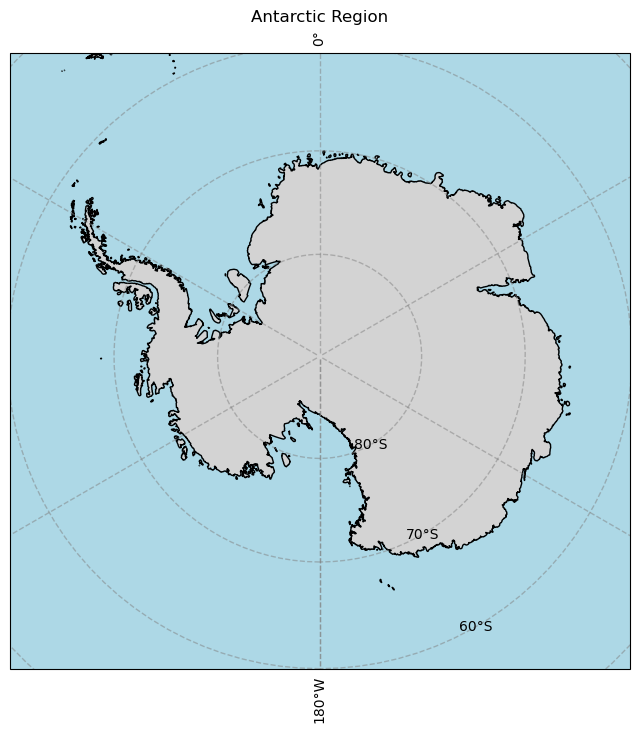

In [79]:
# Create a new figure with Cartopy projection
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())

# Plot the coastline
ax.coastlines(resolution='10m')

# Add features such as land, ocean, and lakes
ax.add_feature(cfeature.LAND, color='lightgray')
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.add_feature(cfeature.LAKES, color='lightblue')

# Set extent to the Antarctic region
ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())

# Plot your data here (replace with your own data plotting code)
#plt.scatter(pLong, pLat, s=10, c='blue', transform=ccrs.PlateCarree())
plt.scatter(select_long,select_lat,s=10,c = select,marker = '.', transform=ccrs.PlateCarree())
#plt.scatter((106.837328),(-78.464422), transform=ccrs.PlateCarree())
#plt.scatter( combined_Longitude,combined_Latitude, c='blue',transform=ccrs.PlateCarree())
# Add gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}

plt.title('Antarctic Region')
plt.show()